In [271]:
import pandas as pd
import numpy as np

In [272]:
case=pd.read_csv('C:/Users/SHUBHAM/Desktop/data/Corona/time_series_covid_19_confirmed.csv')
death=pd.read_csv('C:/Users/SHUBHAM/Desktop/data/Corona/time_series_covid_19_deaths.csv')
recovered=pd.read_csv('C:/Users/SHUBHAM/Desktop/data/Corona/time_series_covid_19_recovered.csv')
case

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,NaN
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,414,414,418,418,422,426,428,428,429,NaN
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,NaN
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,NaN
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,102,119,120,124,124,125,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
400,NaN,Jamaica,18.1096,-77.2975,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
401,NaN,Reunion,-21.1151,55.5364,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
402,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [273]:
dates = ['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', 
         '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', 
         '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', 
         '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20','2/20/20','2/21/20','2/22/20','2/23/20','2/24/20','2/25/20',
        '2/26/20','2/27/20','2/28/20','2/29/20','3/1/20','3/2/20','3/3/20','3/4/20','3/5/20','3/6/20','3/7/20','3/8/20','3/9/20','3/10/20']

In [274]:
conf_df_long=case.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=dates, var_name='Date', value_name='Confirmed')

In [275]:
deaths_df_long = death.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

recv_df_long = recovered.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

full_table = pd.concat([conf_df_long, deaths_df_long['Deaths'], recv_df_long['Recovered']], 
                       axis=1,sort=False)
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
19791,Saint Barthelemy,France,17.9000,-62.8333,3/10/20,0,0,0
19792,NaN,Jamaica,18.1096,-77.2975,3/10/20,0,0,0
19793,NaN,Reunion,-21.1151,55.5364,3/10/20,0,0,0
19794,NaN,Turkey,38.9637,35.2433,3/10/20,0,0,0


In [276]:
# converting to proper data format
full_table['Date'] = pd.to_datetime(full_table['Date'])
full_table['Recovered'] = full_table['Recovered'].astype('int')

# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values with 0 in columns ('Confirmed', 'Deaths', 'Recovered')
full_table[['Confirmed', 'Deaths', 'Recovered']] = full_table[['Confirmed', 'Deaths', 'Recovered']].fillna(0)
full_table[['Province/State']] = full_table[['Province/State']].fillna('NA')

# cases in the Diamond Princess cruise ship
ship = full_table[full_table['Province/State']=='Diamond Princess cruise ship']

# full table
full_table = full_table[full_table['Province/State']!='Diamond Princess cruise ship']
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0
1,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0
2,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0
3,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0
4,Gansu,China,36.0611,103.8343,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
19791,Saint Barthelemy,France,17.9000,-62.8333,2020-03-10,0,0,0
19792,NA,Jamaica,18.1096,-77.2975,2020-03-10,0,0,0
19793,NA,Reunion,-21.1151,55.5364,2020-03-10,0,0,0
19794,NA,Turkey,38.9637,35.2433,2020-03-10,0,0,0


In [277]:
china = full_table[full_table['Country/Region']=='China']
row = full_table[full_table['Country/Region']!='China']

full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()
china_latest = full_latest[full_latest['Country/Region']=='China']
row_latest = full_latest[full_latest['Country/Region']!='China']

full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

<ipython-input-277-76e750f51e26>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
<ipython-input-277-76e750f51e26>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  china_latest_grouped = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
<ipython-input-277-76e750f51e26>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()


In [278]:
temp = full_latest.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered'].max()
temp.style.background_gradient(cmap='Pastel1_r')


<ipython-input-278-01b850bb4b2b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = full_latest.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered'].max()


In [279]:
chinaonly = full_table[full_table['Country/Region']=='China']

In [280]:
chinaonly

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0
1,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0
2,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0
3,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0
4,Gansu,China,36.0611,103.8343,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
19774,Inner Mongolia,China,44.0935,113.9448,2020-03-10,0,0,0
19775,Ningxia,China,37.2692,106.1655,2020-03-10,0,0,0
19779,Qinghai,China,35.7452,95.9956,2020-03-10,0,0,0
19780,Macau,China,22.1667,113.5500,2020-03-10,0,0,0


In [281]:
chinadatewise=chinaonly.groupby('Date')['Confirmed','Deaths','Recovered'].sum().reset_index()

<ipython-input-281-f5f0d20cda45>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chinadatewise=chinaonly.groupby('Date')['Confirmed','Deaths','Recovered'].sum().reset_index()


In [282]:
chinadatewise

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,547,17,28
1,2020-01-23,639,18,30
2,2020-01-24,916,26,36
3,2020-01-25,1399,42,39
4,2020-01-26,2062,56,49
5,2020-01-27,2863,82,58
6,2020-01-28,5494,131,101
7,2020-01-29,6070,133,120
8,2020-01-30,8124,171,135
9,2020-01-31,9783,213,214


In [283]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

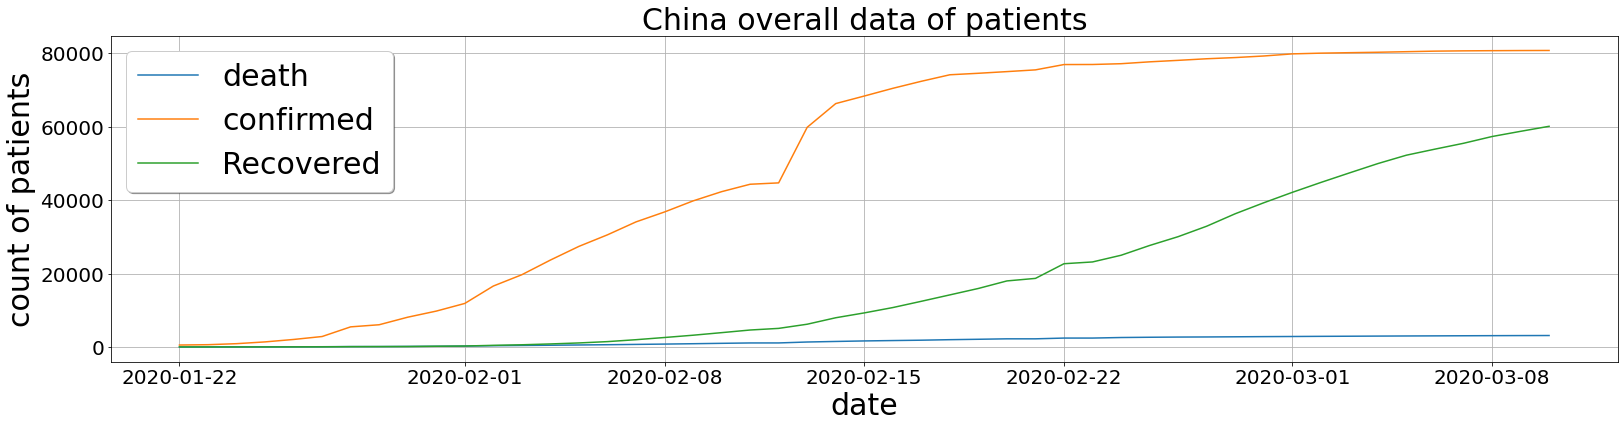

In [308]:
plt.figure(figsize=(27,6))
plt.plot(chinadatewise['Date'],chinadatewise['Deaths'],label='death')
plt.plot(chinadatewise['Date'],chinadatewise['Confirmed'],label='confirmed')
plt.plot(chinadatewise['Date'],chinadatewise['Recovered'],label='Recovered')
plt.xlabel('date',fontsize=30)
plt.ylabel('count of patients',fontsize=30)
plt.legend(loc='best',fontsize='30',shadow=True)
plt.grid()
plt.title('China overall data of patients',fontsize=30)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

In [285]:
chinastate=chinaonly.groupby('Province/State')['Confirmed','Deaths','Recovered'].sum().reset_index()

<ipython-input-285-19370ea4bf03>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chinastate=chinaonly.groupby('Province/State')['Confirmed','Deaths','Recovered'].sum().reset_index()


In [286]:
chinastate

,Province/State,Confirmed,Deaths,Recovered
0,Anhui,34777,173,18897
1,Beijing,14894,178,6218
2,Chongqing,21169,179,10584
3,Fujian,11030,20,5499
4,Gansu,3560,63,2150
5,Guangdong,49143,161,24296
6,Guangxi,9065,58,3983
7,Guizhou,4946,57,2580
8,Hainan,6060,159,3260
9,Hebei,10637,166,6408


Text(0.5, 1.0, 'China overall data of patients vs cities they are from')

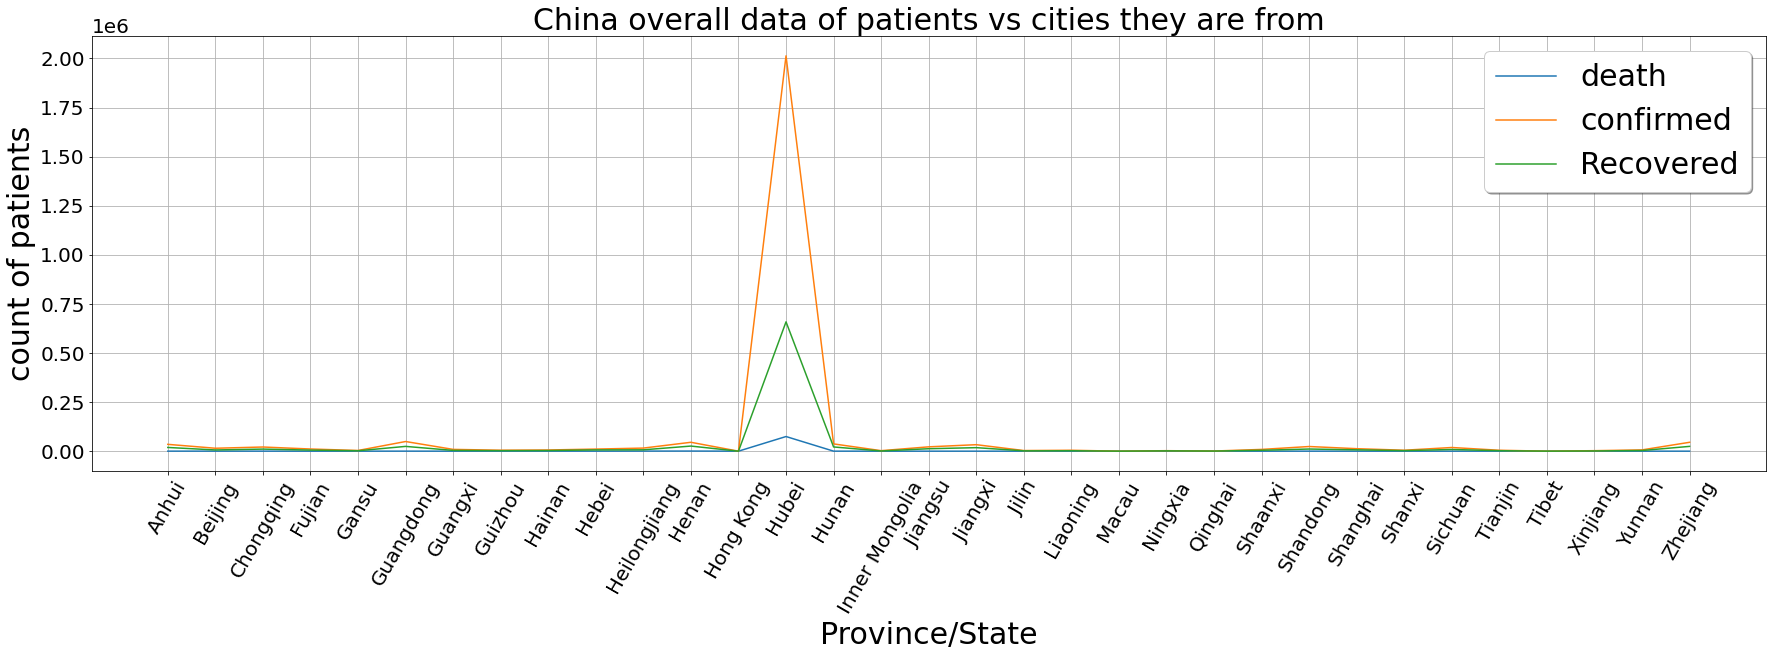

In [314]:
plt.figure(figsize=(30,8))
plt.plot(chinastate['Province/State'],chinastate['Deaths'],label='death')
plt.plot(chinastate['Province/State'],chinastate['Confirmed'],label='confirmed')
plt.plot(chinastate['Province/State'],chinastate['Recovered'],label='Recovered')
plt.xlabel('Province/State',fontsize=30)
plt.ylabel('count of patients',fontsize=30)
plt.legend(loc='best',fontsize=30,shadow=True)
plt.xticks(rotation=60)
plt.grid()
plt.title('China overall data of patients vs cities they are from', fontsize=30)

